In [2]:
from pathlib import Path



In [5]:
list(Path().iterdir())


[PosixPath('run.py'),
 PosixPath('Visualization.ipynb'),
 PosixPath('experiments'),
 PosixPath('projects'),
 PosixPath('pyproject.toml'),
 PosixPath('README.md'),
 PosixPath('evaluate'),
 PosixPath('.gitignore'),
 PosixPath('.env'),
 PosixPath('evaluate.py'),
 PosixPath('poetry.lock'),
 PosixPath('.git'),
 PosixPath('src')]

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


evaluations = ["test1.json", "test2.json"]

def load_datasets(names):
    datasets = {}
    for name in names:
        with open("evaluate/" + name, "r") as f:
            datasets[name.split(".json")[0]] = pd.DataFrame(json.load(f))
            
    return datasets

datasets = load_datasets(evaluations)
datasets["test1"].head()

,project_name,time,turns_database,turns_backend,turns_frontend,working,human_feedback
0,SneakerFreak,204,1,2,3,0,0
1,SneakerFreak2,254,3,5,2,0,0
2,SneakerFreak3,330,2,3,4,0,0
3,SneakerFreak4,254,1,5,2,0,0
4,SneakerFreak5,330,5,1,2,0,0


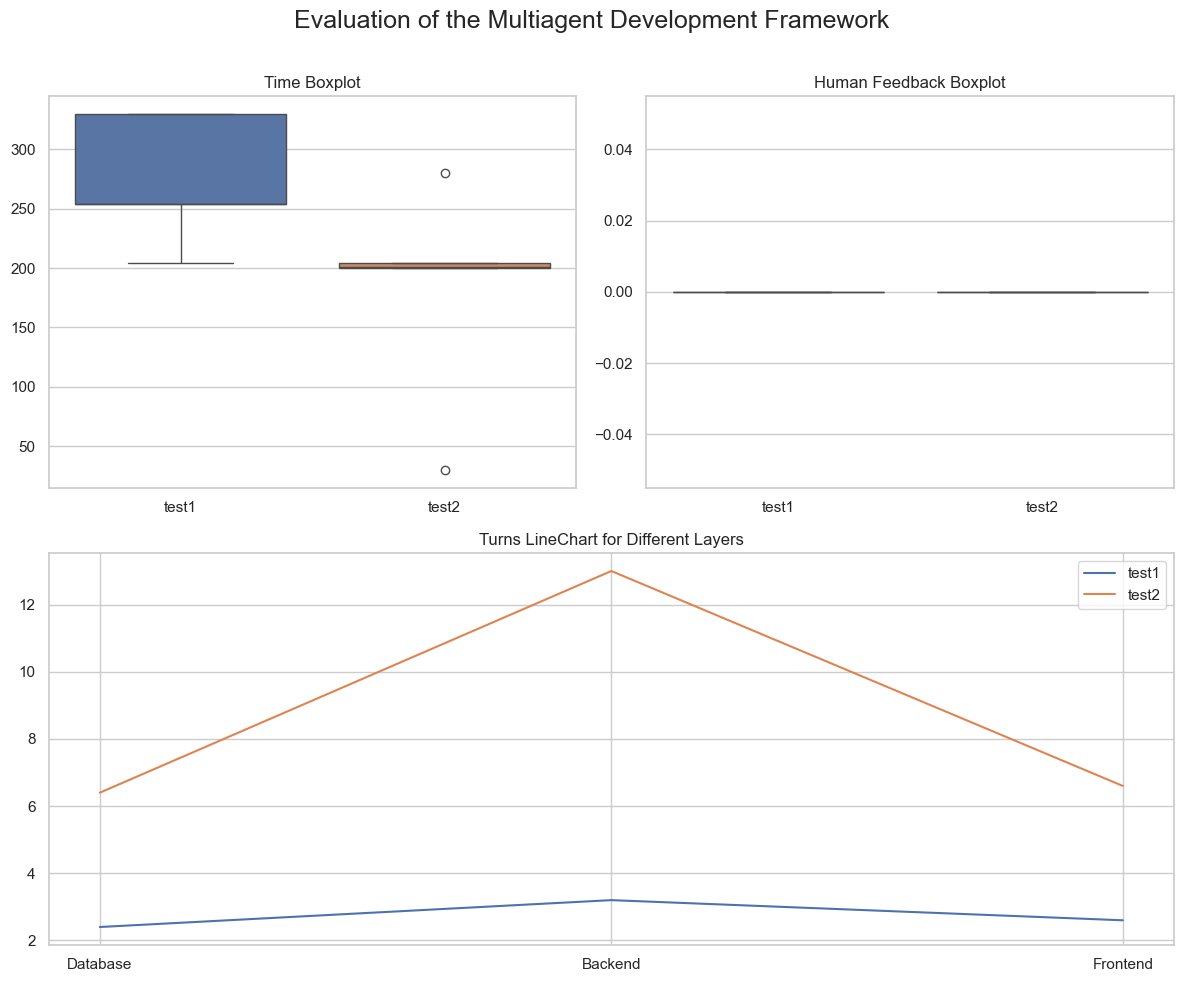

In [10]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create the figure and grid spec
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2)

plt.suptitle('Evaluation of the Multiagent Development Framework\n', size=18)

# Time Boxplot
ax_time = fig.add_subplot(gs[0, 0])
sns.boxplot(data=pd.DataFrame({name: dataset['time'] for name, dataset in datasets.items()}), ax=ax_time)
ax_time.set_title('Time Boxplot')

# Human Feedback Boxplot
ax_feedback = fig.add_subplot(gs[0, 1])
sns.boxplot(data=pd.DataFrame({name: dataset['human_feedback'] for name, dataset in datasets.items()}), ax=ax_feedback)
ax_feedback.set_title('Human Feedback Boxplot')

# Linechart for turns spanning the width of both boxplots
ax_linechart = fig.add_subplot(gs[1, :])
for name, dataset in datasets.items():
    database_mean = dataset["turns_database"].mean()
    backend_mean = dataset["turns_backend"].mean()
    frontend_mean = dataset["turns_frontend"].mean()

    # Data for line chart
    line_data = [database_mean, backend_mean, frontend_mean]
    line_labels = ["Database", "Backend", "Frontend"]

    sns.lineplot(x=line_labels, y=line_data, label=name, ax=ax_linechart)
ax_linechart.set_title('Turns LineChart for Different Layers')
ax_linechart.legend()

# Adjust layout
plt.tight_layout()
plt.show()